# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
city

'zhigansk'

In [4]:
units = "Imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'cod': '400', 'message': 'Nothing to geocode'}

In [5]:
weather_json.keys()

dict_keys(['cod', 'message'])

In [6]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
name = []



# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")     
print("-----------------------------")
      
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #print(city)
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print("city not found")
        pass
for x in range(len(country)):
    print(name[x], lat[x], lng[x], max_temp[x], humidity[x], cloudiness[x], wind_speed[x], country[x], date[x])    


Beginning Data Retrieval
-----------------------------
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
Yellowknife 62.456 -114.3525 56.28 76 100 5.99 CA 1628233763
Longyearbyen 78.2186 15.6401 46.24 66 75 2.3 SJ 1628233764
Antalaha -14.9003 50.2788 74.79 61 51 10.67 MG 1628233764
Menongue -14.6585 17.691 64.62 21 0 6.17 AO 162

Kalmunai 7.4167 81.8167 91.53 50 100 5.39 LK 1628233854
Klyuchi 52.2667 79.1667 77.31 40 97 11.27 RU 1628233854
Springbok -29.6643 17.8865 55.98 30 0 4.61 ZA 1628233855
Khingansk 49.1167 131.1833 69.48 82 81 4.56 RU 1628233855
Katangli 51.7102 143.2326 53.69 98 100 11.54 RU 1628233855
Vallenar -28.5708 -70.7581 59.99 59 15 0.81 CL 1628233856
Kropotkin 45.4375 40.5756 94.32 26 0 17.47 RU 1628233856
Cayenne 4.9333 -52.3333 73.44 91 0 3.44 GF 1628233856
Bossangoa 6.4926 17.4552 73.18 90 100 2.48 CF 1628233857
Ahipara -35.1667 173.1667 55.31 88 23 19.53 NZ 1628233857
Shihezi 44.3 86.0333 91.38 22 0 6.98 CN 1628233857
Codrington -38.2667 141.9667 52.95 84 100 12.44 AU 1628233858
Pedreiras -4.5688 -44.6003 71.19 56 71 2.68 BR 1628233858
Sandanski 41.5667 23.2833 87.17 32 16 9.26 BG 1628233858
Dunedin -45.8742 170.5036 47.8 77 36 4.41 NZ 1628233599
Iwanai 42.9744 140.5089 83.75 71 79 5.21 JP 1628233859
Pacific Grove 36.6177 -121.9166 62.29 91 90 3 US 1628233730
Vilyuysk 63.7553 121.6247 78.8 

Novyy Svit 47.8059 38.0211 87.08 32 24 14.27 UA 1628233945
Linkou 45.3 130.2833 81.27 52 100 6.55 CN 1628233945
Daru -9.0763 143.2092 78.04 76 28 13.22 PG 1628233945
Kiama -34.6833 150.8667 66.38 54 0 1.99 AU 1628233946
Skibbereen 51.55 -9.2667 58.8 80 22 18.1 IE 1628233946
Kenai 60.5544 -151.2583 60.03 96 90 10.36 US 1628233667
Yatou 37.15 122.3833 80.69 73 23 6.42 CN 1628233947
Tezu 27.9167 96.1667 98.31 46 76 3.62 IN 1628233947
Sarīla 25.7667 79.6833 90.59 63 100 6.6 IN 1628233947
Pingliang 35.5392 106.6861 90.54 19 95 11.5 CN 1628233948
Conceição da Barra -18.5933 -39.7322 65.53 81 9 6.33 BR 1628233948
Dandong 40.1292 124.3947 79.18 73 99 4.63 CN 1628233768
Azpeitia 43.1825 -2.2669 65.93 89 97 0.38 ES 1628233948
Polovinnoye 54.7914 65.9864 85.48 40 18 9.62 RU 1628233949
Knyaze-Volkonskoye 48.4642 135.4567 79.14 75 99 2.33 RU 1628233949
Yiyang 28.5892 112.3283 90.18 66 99 10.31 CN 1628233949
Hanchuan 30.65 113.7667 90.72 67 99 11.18 CN 1628233950
Simões -7.5989 -40.8178 68.31 69 57 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data = pd.DataFrame({"City": name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, 
                             "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})
weather_data.to_csv('../output_data/cities.csv')

weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,56.28,76,100,5.99,CA,1628233763
1,Longyearbyen,78.2186,15.6401,46.24,66,75,2.30,SJ,1628233764
2,Antalaha,-14.9003,50.2788,74.79,61,51,10.67,MG,1628233764
3,Menongue,-14.6585,17.6910,64.62,21,0,6.17,AO,1628233764
4,Bredasdorp,-34.5322,20.0403,56.28,91,89,4.38,ZA,1628233765
...,...,...,...,...,...,...,...,...,...
558,Bundaberg,-24.8500,152.3500,67.21,57,91,3.00,AU,1628233954
559,Ponta Delgada,37.7333,-25.6667,72.32,94,40,10.36,PT,1628233954
560,Uppsala County,60.0000,17.7500,65.62,66,0,6.91,SE,1628233954
561,Jacqueville,5.2052,-4.4146,73.31,87,10,5.73,CI,1628233955


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data[(weather_data["Humidity"] > 100)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.669955,22.332957,71.407282,67.639432,55.598579,7.803108,1.628234e+09
std,33.029433,90.933772,13.778063,22.735200,41.245452,5.409472,7.463778e+01
min,-54.800000,-179.166700,33.910000,10.000000,0.000000,0.000000,1.628233e+09
25%,-5.257750,-57.735700,62.020000,53.000000,8.000000,3.560000,1.628234e+09
50%,28.066700,25.511200,72.270000,72.000000,69.000000,6.600000,1.628234e+09
75%,48.738150,102.853200,81.285000,87.000000,99.000000,11.140000,1.628234e+09
max,78.218600,179.316700,102.310000,100.000000,100.000000,27.600000,1.628234e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
clean_city_data = weather_data.copy()
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,56.28,76,100,5.99,CA,1628233763
1,Longyearbyen,78.2186,15.6401,46.24,66,75,2.30,SJ,1628233764
2,Antalaha,-14.9003,50.2788,74.79,61,51,10.67,MG,1628233764
3,Menongue,-14.6585,17.6910,64.62,21,0,6.17,AO,1628233764
4,Bredasdorp,-34.5322,20.0403,56.28,91,89,4.38,ZA,1628233765
...,...,...,...,...,...,...,...,...,...
558,Bundaberg,-24.8500,152.3500,67.21,57,91,3.00,AU,1628233954
559,Ponta Delgada,37.7333,-25.6667,72.32,94,40,10.36,PT,1628233954
560,Uppsala County,60.0000,17.7500,65.62,66,0,6.91,SE,1628233954
561,Jacqueville,5.2052,-4.4146,73.31,87,10,5.73,CI,1628233955


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

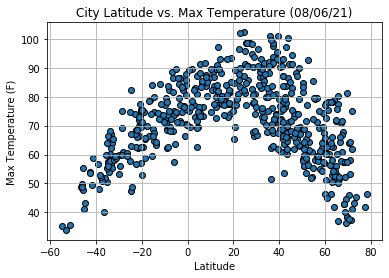

In [13]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/06/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

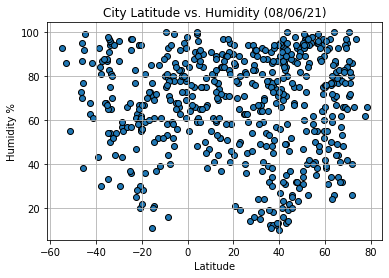

In [14]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (08/06/21)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

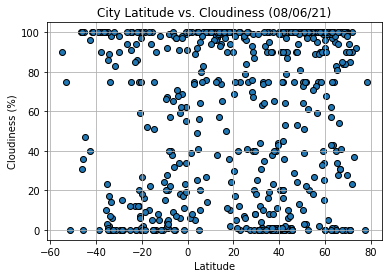

In [15]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/06/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

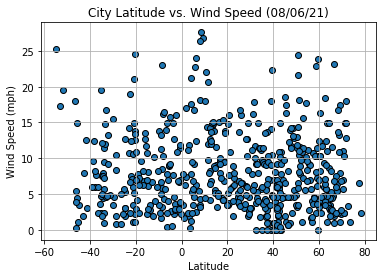

In [16]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (08/06/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
#create seperate dataframes using conditions for northern and southern hemispheres

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.0x +71.31
The r-value is: 0.00010755902016170998


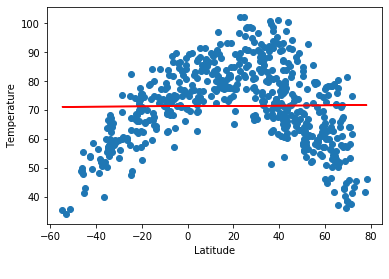

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(clean_city_data["Lat"], clean_city_data["Max Temp"])

# Get regression values
regress_values = clean_city_data["Lat"] * slope + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.plot(clean_city_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression